## Preprocessing Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

#### Generating some fake data:
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [3]:
#Preprocess data for training with Keras
for i in range(50):
    # The 5% of younger (under 65) individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older (65 or older) individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger (under 65) individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older (65 or older) individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
# print raw data:
for i in train_samples[0:6]: # printing just first 7 elements
    print(i)

40
97
33
90
55
67


In [5]:
for i in train_labels[0:6]:
    print(i)

1
0
1
0
1
0


In [6]:
#convert to numpy arrays (keras expexted to deal with numpy arrays)
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [7]:
# scalling the data 
# Scikit learn MinnMaxScalor scales data input [13, -100] to be in range [0,1]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [8]:
# print scaled data
for i in scaled_train_samples[0:9]:
    print(i)

[0.31034483]
[0.96551724]
[0.22988506]
[0.88505747]
[0.48275862]
[0.62068966]
[0.57471264]
[0.75862069]
[0.1954023]


## Creat Sequential Model

In [9]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [10]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2,  activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Training with validation set

In [12]:
model.compile(Adam(lr=.001),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) # lr: learning Rate

In [13]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.5357 - acc: 0.7540 - val_loss: 0.3273 - val_acc: 0.9524
Epoch 2/20
 - 0s - loss: 0.3238 - acc: 0.9185 - val_loss: 0.1708 - val_acc: 0.9476
Epoch 3/20
 - 0s - loss: 0.2792 - acc: 0.9254 - val_loss: 0.1297 - val_acc: 0.9810
Epoch 4/20
 - 0s - loss: 0.2683 - acc: 0.9307 - val_loss: 0.1277 - val_acc: 0.9762
Epoch 5/20
 - 0s - loss: 0.2631 - acc: 0.9386 - val_loss: 0.1110 - val_acc: 0.9952
Epoch 6/20
 - 0s - loss: 0.2608 - acc: 0.9365 - val_loss: 0.1225 - val_acc: 0.9714
Epoch 7/20
 - 0s - loss: 0.2601 - acc: 0.9360 - val_loss: 0.1169 - val_acc: 0.9762
Epoch 8/20
 - 0s - loss: 0.2562 - acc: 0.9402 - val_loss: 0.1030 - val_acc: 0.9952
Epoch 9/20
 - 0s - loss: 0.2578 - acc: 0.9376 - val_loss: 0.1001 - val_acc: 0.9952
Epoch 10/20
 - 0s - loss: 0.2541 - acc: 0.9402 - val_loss: 0.0960 - val_acc: 0.9952
Epoch 11/20
 - 0s - loss: 0.2531 - acc: 0.9423 - val_loss: 0.1001 - val_ac

## Preprocess Test Data

In [14]:
test_labels =  []
test_samples = []

In [15]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [16]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

## Predict

In [18]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [19]:
for i in predictions[0:6]:
    print(i)

[0.8965963  0.10340365]
[0.01064559 0.9893544 ]
[0.95655626 0.04344372]
[0.01064559 0.9893544 ]
[0.9461243  0.05387567]
[0.01178379 0.9882162 ]


In [20]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [21]:
for i in rounded_predictions[0:6]:
    print(i)

0
1
0
1
0
1


## Create Confusion Matrix for predictions

In [22]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [23]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[191  19]
 [ 10 200]]


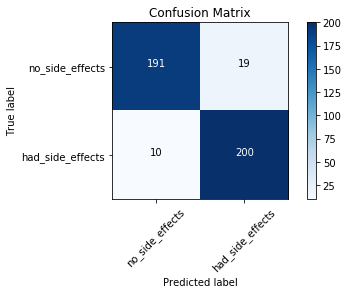

In [25]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Save_and_Load_a_Keras_Model

## 01. model.save()

In [34]:
model.save('.\SavedModels\model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

### Load the Model

In [35]:
from keras.models import load_model
new_model = load_model('.\SavedModels\model.h5')

In [37]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [82]:
new_model.get_weights()[0]

array([[ 0.31390157,  0.30387387, -0.01701951,  0.08893242,  0.41022402,
        -0.5263498 ,  0.58697873,  0.55817896,  0.5308849 ,  0.60317785,
         0.4989894 , -0.36797252,  0.49595878,  0.42327827, -0.54945016,
         0.49503356]], dtype=float32)

In [83]:
len(new_model.get_weights())

6

In [84]:
new_model.optimizer

## 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [87]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yam_string = model.to_yaml()

In [88]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": 

In [90]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)


# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [91]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [92]:
model.save_weights('.\SavedModels\model_weights.h5')

In [93]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [94]:
model2.load_weights('.\SavedModels\model_weights.h5')

In [95]:
model2.get_weights()[0]

array([[ 0.31390157,  0.30387387, -0.01701951,  0.08893242,  0.41022402,
        -0.5263498 ,  0.58697873,  0.55817896,  0.5308849 ,  0.60317785,
         0.4989894 , -0.36797252,  0.49595878,  0.42327827, -0.54945016,
         0.49503356]], dtype=float32)